In [140]:
#importing all necessary libraries
import numpy as np
import tensorflow as tf
import keras as k
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout,InputLayer,BatchNormalization

In [113]:
#importing the dataset  and normalizing it
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
"""
we use one hot encoding for the class element of each sample 
so, we transform the y value to a 10 element binary vector
"""
y_train=k.utils.to_categorical(y_train,10)
y_test=k.utils.to_categorical(y_test,10)

In [114]:
#randomizing the data to train the model better
random_val=np.arange(len(x_train))
np.random.shuffle(random_val)
x_train=x_train[random_val]
y_train=y_train[random_val]
#considering 20 percent of the total train data as our train data
x_train=x_train[:10000]
y_train=y_train[:10000]
#creating validation and test data set in equal sizes
x_testdata=x_test[:5000]
y_testdata=y_test[:5000]
x_valdata=x_test[5000:]
y_valdata=y_test[5000:]
#initializing the common variables namely input shape,epochs,batchsize
inputshape=(32,32,3)
no_epochs=5
batchsize=32
tab=pd.DataFrame(columns = ['Number of Layers', 'Number of neurons','Training accuracy','Validation accuracy'])

In [115]:
#MLP Classifier
"""
    In the mlp base model I have considered an dense layer with 256 neurons and output dense layer with 10 neurons.
    This is to analyse the effect of number of layers on the accuracy 
    
    Fully connected layer with 256 units and a sigmoid activation function
    Output layer with the softmax activation function and 10 neurons for the classification task
    
    metrics considered for evaluating the models are :
        ---- categorical_crossentropy
        ---- categorical_accuracy
"""
def mlp_base(neuron):
    model_mlpbase=Sequential()
    model_mlpbase.add(InputLayer(input_shape=inputshape))
    model_mlpbase.add(Flatten())
    model_mlpbase.add(Dense(neuron,activation='sigmoid'))
    model_mlpbase.add(Dense(10,activation='softmax'))
    return model_mlpbase

In [116]:
#compiling the mlp_base for different number of neurons and fitting it on train data and validating it
no_of_neurons=[32,64,128,256,512,1024,2048]
for i in no_of_neurons:
    model_mlpbase_obj=mlp_base(i)
    model_mlpbase_obj.summary()
    op=k.optimizers.Adam()
    model_mlpbase_obj.compile(loss='categorical_crossentropy',optimizer=op,metrics=['categorical_accuracy'])
    history=model_mlpbase_obj.fit(x_train,y_train,epochs=no_epochs,batch_size=batchsize,validation_data=(x_valdata,y_valdata))
    history1=pd.DataFrame(data=history.history)
    final_acc = history1['categorical_accuracy'].iloc[-1]
    final_v_acc =history1['val_categorical_accuracy'].iloc[-1]
    tab = tab.append({tab.columns[0]:int(1),tab.columns[1]:int(i),tab.columns[2]:final_acc,tab.columns[3]:final_v_acc},ignore_index=True)

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_30 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_70 (Dense)             (None, 32)                98336     
_________________________________________________________________
dense_71 (Dense)             (None, 10)                330       
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 2.1564 - categorical_accuracy: 0.2279 - val_loss: 2.0574 - val_categorical_accuracy: 0.2726
Epoch 2/5
313/313 [==============================] - 0s 2ms/step - loss: 1.9744 - categorical_accuracy: 0.3039 - val_loss: 1.9598 - val_categorical_accuracy: 0.3118
Epoch 3/5
313/313 [==============================

313/313 [==============================] - 2s 8ms/step - loss: 2.1288 - categorical_accuracy: 0.2550 - val_loss: 1.9382 - val_categorical_accuracy: 0.2912
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8900 - categorical_accuracy: 0.3171 - val_loss: 1.9249 - val_categorical_accuracy: 0.2864
Epoch 3/5
313/313 [==============================] - 2s 8ms/step - loss: 1.8397 - categorical_accuracy: 0.3401 - val_loss: 1.8257 - val_categorical_accuracy: 0.3416
Epoch 4/5
313/313 [==============================] - 2s 8ms/step - loss: 1.7866 - categorical_accuracy: 0.3614 - val_loss: 1.7760 - val_categorical_accuracy: 0.3634
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.7487 - categorical_accuracy: 0.3737 - val_loss: 1.7932 - val_categorical_accuracy: 0.3480
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_36 (Flatten)         (

In [117]:
print(tab)

   Number of Layers  Number of neurons  Training accuracy  Validation accuracy
0               1.0               32.0             0.3564               0.3438
1               1.0               64.0             0.3635               0.3630
2               1.0              128.0             0.3760               0.3566
3               1.0              256.0             0.3859               0.3750
4               1.0              512.0             0.3768               0.3634
5               1.0             1024.0             0.3737               0.3480
6               1.0             2048.0             0.3646               0.3452


In [118]:
#MLP Classifier
"""
    In this mlp base model I have considered on 2 dense layer with 256 neurons and output dense layer with 10 neurons.
    This is to analyze the effect of addition of an extra dense layer.
    
    Fully connected layer with 256 units and a sigmoid activation function
    Fully connected layer with 256 units and a sigmoid activation function
    Output layer with the softmax activation function and 10 neurons for the classification task
"""
def mlp_base1(neuron):
    model_mlpbase1=Sequential()
    model_mlpbase1.add(InputLayer(input_shape=inputshape))
    model_mlpbase1.add(Flatten())
    model_mlpbase1.add(Dense(neuron,activation='sigmoid'))
    model_mlpbase1.add(Dense(neuron,activation='sigmoid'))
    model_mlpbase1.add(Dense(10,activation='softmax'))
    return model_mlpbase1

In [119]:
#compiling the mlp_model and fitting it on train data and validating it
no_of_neurons=[32,64,128,256,512,1024,2048]
for i in no_of_neurons:
    model_mlpbase1_obj=mlp_base1(i)
    model_mlpbase1_obj.summary()
    op=k.optimizers.Adam()
    model_mlpbase1_obj.compile(loss='categorical_crossentropy',optimizer=op,metrics=['categorical_accuracy'])
    history=model_mlpbase1_obj.fit(x_train,y_train,epochs=no_epochs,batch_size=batchsize,validation_data=(x_valdata,y_valdata))
    history1=pd.DataFrame(data=history.history)
    final_acc = history1['categorical_accuracy'].iloc[-1]
    final_v_acc =history1['val_categorical_accuracy'].iloc[-1]
    tab = tab.append({tab.columns[0]:int(2),tab.columns[1]:int(i),tab.columns[2]:final_acc,tab.columns[3]:final_v_acc},ignore_index=True)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_84 (Dense)             (None, 32)                98336     
_________________________________________________________________
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_86 (Dense)             (None, 10)                330       
Total params: 99,722
Trainable params: 99,722
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 2.2316 - categorical_accuracy: 0.1647 - val_loss: 2.1382 - val_categorical_accuracy: 0.1936
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 2.0885 - 

Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8002 - categorical_accuracy: 0.3492 - val_loss: 1.8294 - val_categorical_accuracy: 0.3250
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 1.7675 - categorical_accuracy: 0.3568 - val_loss: 1.8006 - val_categorical_accuracy: 0.3520
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_42 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_99 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_100 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_101 (Dense)            (None, 10)                10250     
Total params: 4,206,602
Trainable params: 4,206,602
N

In [121]:
tab

,Number of Layers,Number of neurons,Training accuracy,Validation accuracy
0,1.0,32.0,0.3564,0.3438
1,1.0,64.0,0.3635,0.3630
2,1.0,128.0,0.3760,0.3566
3,1.0,256.0,0.3859,0.3750
4,1.0,512.0,0.3768,0.3634
5,1.0,1024.0,0.3737,0.3480
6,1.0,2048.0,0.3646,0.3452
7,2.0,32.0,0.2828,0.3008
8,2.0,64.0,0.3489,0.3200
9,2.0,128.0,0.3483,0.3522


In [122]:
%%time
#MLP Classifier (given model in the assignment question)
"""
    Fully connected layer with 512 units and a sigmoid activation function
    Fully connected layer with 512 units and a sigmoid activation function
    Output layer with the softmax activation function and 10 neurons for the classification task

"""
def mlp_1():
    model_mlp1=Sequential()
    model_mlp1.add(InputLayer(input_shape=inputshape))
    model_mlp1.add(Flatten())
    model_mlp1.add(Dense(512,activation='sigmoid'))
    model_mlp1.add(Dense(512,activation='sigmoid'))
    model_mlp1.add(Dense(10,activation='softmax'))
    return model_mlp1

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 15.7 µs


In [123]:
#compiling the mlp_model and fitting it on train data and validating it
model_mlp_1_obj=mlp_1()
model_mlp_1_obj.summary()
op=k.optimizers.Adam()
model_mlp_1_obj.compile(loss='categorical_crossentropy',optimizer=op,metrics=['categorical_accuracy'])
history=model_mlp_1_obj.fit(x_train,y_train,epochs=no_epochs,batch_size=batchsize,validation_data=(x_valdata,y_valdata))

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_44 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_105 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_106 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_107 (Dense)            (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 2s 5ms/step - loss: 2.0917 - categorical_accuracy: 0.2245 - val_loss: 2.0192 - val_categorical_accuracy: 0.2518
Epoch 2/5
313/313 [==============================] - 2s 5ms/step - loss: 1.9

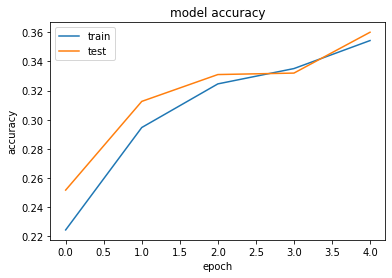

In [124]:
#plotting the accuracy obtained by training and validation dataset
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [125]:
#MLP Classifier
"""
    Fully connected layer with 512 units and a sigmoid activation function
    Fully connected layer with 512 units and a sigmoid activation function
    Fully connected layer with 512 units and a sigmoid activation function
    Output layer with the softmax activation function and 10 neurons for the classification task
"""
def mlp_2(neuron):
    model_mlp2=Sequential()
    model_mlp2.add(InputLayer(input_shape=inputshape))
    model_mlp2.add(Flatten())
    model_mlp2.add(Dense(neuron,activation='sigmoid'))
    model_mlp2.add(Dense(neuron,activation='sigmoid'))
    model_mlp2.add(Dense(neuron,activation='sigmoid'))
    model_mlp2.add(Dense(10,activation='softmax'))
    return model_mlp2

In [126]:
#compiling the mlp_model and fitting it on train data and validating it
no_of_neurons=[32,64,128,256,512,1024,2048]
for i in no_of_neurons:
    model_mlp_2_obj=mlp_2(i)
    model_mlp_2_obj.summary()
    op=k.optimizers.Adam()
    model_mlp_2_obj.compile(loss='categorical_crossentropy',optimizer=op,metrics=['categorical_accuracy'])
    history=model_mlp_2_obj.fit(x_train,y_train,epochs=no_epochs,batch_size=batchsize,validation_data=(x_valdata,y_valdata))
    history1=pd.DataFrame(data=history.history)
    final_acc = history1['categorical_accuracy'].iloc[-1]
    final_v_acc =history1['val_categorical_accuracy'].iloc[-1]
    tab = tab.append({tab.columns[0]:int(3),tab.columns[1]:int(i),tab.columns[2]:final_acc,tab.columns[3]:final_v_acc},ignore_index=True)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_45 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_108 (Dense)            (None, 32)                98336     
_________________________________________________________________
dense_109 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_110 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_111 (Dense)            (None, 10)                330       
Total params: 100,778
Trainable params: 100,778
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 2.3012 - categorical_accuracy: 0.1253 - 

313/313 [==============================] - 2s 6ms/step - loss: 2.1021 - categorical_accuracy: 0.2036 - val_loss: 1.9976 - val_categorical_accuracy: 0.2458
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 1.9488 - categorical_accuracy: 0.2745 - val_loss: 1.9500 - val_categorical_accuracy: 0.2768
Epoch 3/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8963 - categorical_accuracy: 0.3029 - val_loss: 1.8481 - val_categorical_accuracy: 0.3230
Epoch 4/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8534 - categorical_accuracy: 0.3190 - val_loss: 1.8824 - val_categorical_accuracy: 0.3302
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 1.8220 - categorical_accuracy: 0.3282 - val_loss: 1.8530 - val_categorical_accuracy: 0.3178
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_50 (Flatten)         (

In [127]:
tab

,Number of Layers,Number of neurons,Training accuracy,Validation accuracy
0,1.0,32.0,0.3564,0.3438
1,1.0,64.0,0.3635,0.3630
2,1.0,128.0,0.3760,0.3566
3,1.0,256.0,0.3859,0.3750
4,1.0,512.0,0.3768,0.3634
5,1.0,1024.0,0.3737,0.3480
6,1.0,2048.0,0.3646,0.3452
7,2.0,32.0,0.2828,0.3008
8,2.0,64.0,0.3489,0.3200
9,2.0,128.0,0.3483,0.3522


In [84]:
#predicting on test data set
prediction=model_mlp_1_obj.evaluate(x_testdata,y_testdata)
print(prediction)

157/157 [==============================] - 0s 2ms/step - loss: 1.7768 - categorical_accuracy: 0.3604
[1.7768123149871826, 0.36039999127388]


In [85]:
print("Test Accuracy:", prediction[1]*100)

Test Accuracy: 36.039999127388


In [86]:
%%time
#cnn_1
"""
    2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
    2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
    Fully connected (Dense) layer with 512 units and a sigmoid activation function
    Fully connected layer with 512 units and a sigmoid activation function
    Output layer with the softmax activation function and 10 neurons for the classification task
"""
def cnn_1():
    model_cnn1=Sequential()
    model_cnn1.add(Conv2D(64,(3,3),activation = 'relu',input_shape=inputshape))
    model_cnn1.add(Conv2D(64,(3,3),activation='relu'))
    model_cnn1.add(Flatten())
    model_cnn1.add(Dense(512,activation='sigmoid'))
    model_cnn1.add(Dense(512,activation='sigmoid'))
    model_cnn1.add(Dense(10,activation='softmax'))
    return model_cnn1

CPU times: user 7 µs, sys: 3 µs, total: 10 µs
Wall time: 13.8 µs


In [87]:
#compiling the cnn_1 and fitting it on train data and validating it
model_cnn1=cnn_1()
model_cnn1.summary()
op=k.optimizers.Adam()
model_cnn1.compile(loss='categorical_crossentropy',optimizer=op,metrics=['categorical_accuracy'])
history=model_cnn1.fit(x_train,y_train,epochs=no_epochs,batch_size=batchsize,validation_data=(x_valdata,y_valdata))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               25690624  
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
_________________________________________

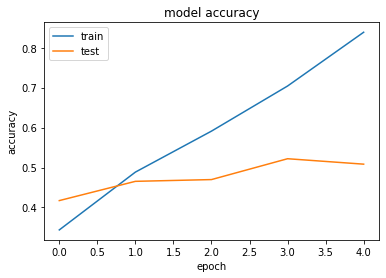

In [88]:
#plotting the accuracy obtained by training and validation dataset
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [89]:
#predicting on test data set
prediction=model_cnn1.evaluate(x_testdata,y_testdata)
print(prediction)

157/157 [==============================] - 3s 21ms/step - loss: 1.5794 - categorical_accuracy: 0.5206
[1.5793603658676147, 0.5206000208854675]


In [90]:
print("Test Accuracy:", prediction[1]*100)

Test Accuracy: 52.06000208854675


In [91]:
%%time
#cnn_2
"""
    2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
    2x2 Max pooling layer
    2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
    2x2 Max pooling layer
    Fully connected layer with 512 units and a sigmoid activation function
    Dropout layer with 0.2 dropout rate
    Fully connected layer with 512 units and a sigmoid activation function
    Dropout layer with 0.2 dropout rate
    Output layer with the softmax activation function and 10 neurons for the classification task
"""
def cnn_2():
    model_cnn2=Sequential()
    model_cnn2.add(Conv2D(64,(3,3),activation = 'relu',input_shape=inputshape))
    model_cnn2.add(MaxPooling2D(pool_size=(2,2)))
    model_cnn2.add(Conv2D(64,(3,3),activation='relu'))
    model_cnn2.add(MaxPooling2D(pool_size=(2,2)))
    model_cnn2.add(Flatten())
    model_cnn2.add(Dense(512,activation='sigmoid'))
    model_cnn2.add(Dropout(0.2))
    model_cnn2.add(Dense(10,activation='softmax'))
    return model_cnn2

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 13.1 µs


In [92]:
#compiling the cnn_1 and fitting it on train data and validating it
model_cnn2=cnn_2()
model_cnn2.summary()
op=k.optimizers.Adam()
model_cnn2.compile(loss='categorical_crossentropy',optimizer=op,metrics=['categorical_accuracy'])
history=model_cnn2.fit(x_train,y_train,epochs=no_epochs,batch_size=batchsize,validation_data=(x_valdata,y_valdata))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dropout (Dropout)            (None, 512)             

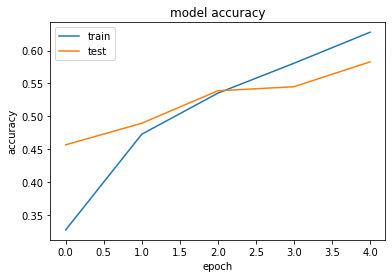

In [93]:
#plotting the accuracy obtained by training and validation dataset
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [94]:
#predicting on test data set
prediction=model_cnn2.evaluate(x_testdata,y_testdata)
print(prediction)

157/157 [==============================] - 1s 7ms/step - loss: 1.1529 - categorical_accuracy: 0.5884
[1.1528929471969604, 0.5884000062942505]


In [95]:
print("Test Accuracy:", prediction[1]*100)

Test Accuracy: 58.84000062942505


In [129]:
tab

,Number of Layers,Number of neurons,Training accuracy,Validation accuracy
0,1.0,32.0,0.3564,0.3438
1,1.0,64.0,0.3635,0.3630
2,1.0,128.0,0.3760,0.3566
3,1.0,256.0,0.3859,0.3750
4,1.0,512.0,0.3768,0.3634
5,1.0,1024.0,0.3737,0.3480
6,1.0,2048.0,0.3646,0.3452
7,2.0,32.0,0.2828,0.3008
8,2.0,64.0,0.3489,0.3200
9,2.0,128.0,0.3483,0.3522


In [141]:
#improvement to the network
def cnn_3():
    cnn3Model=Sequential()
    cnn3Model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=inputshape, padding = 'same'))
    cnn3Model.add(BatchNormalization())
    cnn3Model.add(MaxPooling2D(pool_size=(2,2)))
    cnn3Model.add(Dropout(0.2))
    cnn3Model.add(Conv2D(64,(3,3),activation = 'relu', padding = 'same'))
    cnn3Model.add(BatchNormalization())
    cnn3Model.add(MaxPooling2D(pool_size=(2,2)))
    cnn3Model.add(Dropout(0.3))
    cnn3Model.add(Conv2D(128,(3,3),activation = 'relu', padding = 'same'))
    cnn3Model.add(BatchNormalization())
    cnn3Model.add(MaxPooling2D(pool_size=(2,2)))
    cnn3Model.add(Flatten())
    cnn3Model.add(Dense(256,activation='sigmoid'))
    cnn3Model.add(Dropout(0.4))
    cnn3Model.add(Dense(10,activation='softmax'))
    return cnn3Model

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)        

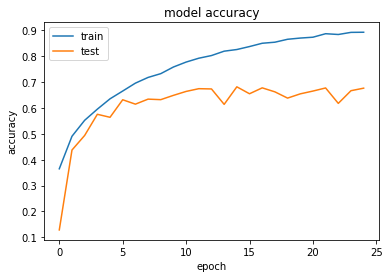

157/157 [==============================] - 2s 10ms/step - loss: 1.1731 - categorical_accuracy: 0.6772
[1.1730705499649048, 0.6772000193595886]
Test Accuracy: 67.72000193595886


In [142]:
#compiling the cnn_1 and fitting it on train data and validating it
model_cnn3=cnn_3()
model_cnn3.summary()
op=k.optimizers.Adam()
model_cnn3.compile(loss='categorical_crossentropy',optimizer=op,metrics=['categorical_accuracy'])
history=model_cnn3.fit(x_train,y_train,epochs=25,batch_size=batchsize,validation_data=(x_valdata,y_valdata))
#plotting the accuracy obtained by training and validation dataset
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
#predicting on test data set
prediction=model_cnn3.evaluate(x_testdata,y_testdata)
print(prediction)
print("Test Accuracy:", prediction[1]*100)